# E7-PROJECT: Hotel Reservations

## 1. Loading data

In [1]:
# Import libraries for data analysis.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Hotel Reservations.csv")

In [4]:
# Load the dataset into Pandas DataFrame.

data = pd.read_csv("Hotel Reservations.csv")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("Column names:")
print(data.columns.tolist())

Number of rows: 36275
Number of columns: 19
Column names:
['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [3]:
# Check for missing values in the dataset.
data.isna().value_counts()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  booking_status
False       False         False           False                 False              False              False                       False               False      False         False          False         False                False           False                         False                                 False               False                   False             36275
Name: count, dtype: int64

## 2. Data Exploration

In [4]:
# Import visualization library

import plotnine as p9

In [5]:
data.describe()
# TODO:
# required_car_parking_space seems more like a categorical feature, not numerical

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [14]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Arrival_Date_Combined
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21


### 14 numeric fields
no_of_adults<br>
no_of_children<br>
no_of_weekend_nights<br>
no_of_week_nights<br>
required_car_parking_space<br>
arrival_year<br> 	
arrival_month<br> 	
arrival_date<br> 	
repeated_guest<br> 	
no_of_previous_cancellations<br> 	
no_of_previous_bookings_not_canceled<br> 	
no_of_special_requests<br>
lead_time ----- (histogram)<br>
avg_price_per_room ----- (histogram)<br>

### 5 categorical
Booking_ID <br>
type_of_meal_plan, no or 1-3<br>
room_type_reserved, 1-7<br>
market_segment_type <br>
booking_status<br>

In [6]:
# barplot function

def plot_a_barplot(x):
    plot = (p9.ggplot(
                data = data,
                mapping = p9.aes(x = x)
                ) +
                p9.geom_bar() +
                p9.geom_text(
                    p9.aes(label = p9.after_stat('count')),
                        stat = 'count',
                        nudge_y = -10,
                        va = 'top',
                        angle = 90
                    ) +
                p9.theme(figure_size = (12, 8))
                )
    return plot

In [7]:
# max / min date

def get_date_periods_by_field(field_name):
    
    date_periods = data.groupby(field_name)['Arrival_Date_Combined'].agg(
        **{
            'Start Date': 'min',
            'End Date': 'max'
        }
    )
    
    print(f"\n Date Period Analysis for: {field_name}")
    return date_periods

1
booking_status
Not_Canceled    668
Canceled        465
Name: count, dtype: int64
3.91%

2
booking_status
Not_Canceled    1023
Canceled         308
Name: count, dtype: int64
2.59%

3
booking_status
Not_Canceled    695
Canceled        403
Name: count, dtype: int64
3.39%

4
booking_status
Not_Canceled    853
Canceled        474
Name: count, dtype: int64
3.99%

5
booking_status
Not_Canceled    826
Canceled        328
Name: count, dtype: int64
2.76%

6
booking_status
Not_Canceled    829
Canceled        444
Name: count, dtype: int64
3.74%

7
booking_status
Not_Canceled    746
Canceled        364
Name: count, dtype: int64
3.06%

8
booking_status
Not_Canceled    842
Canceled        356
Name: count, dtype: int64
3.00%

9
booking_status
Not_Canceled    836
Canceled        294
Name: count, dtype: int64
2.47%

10
booking_status
Not_Canceled    771
Canceled        318
Name: count, dtype: int64
2.68%

11
booking_status
Not_Canceled    768
Canceled        330
Name: count, dtype: int64
2.78%

12
boo

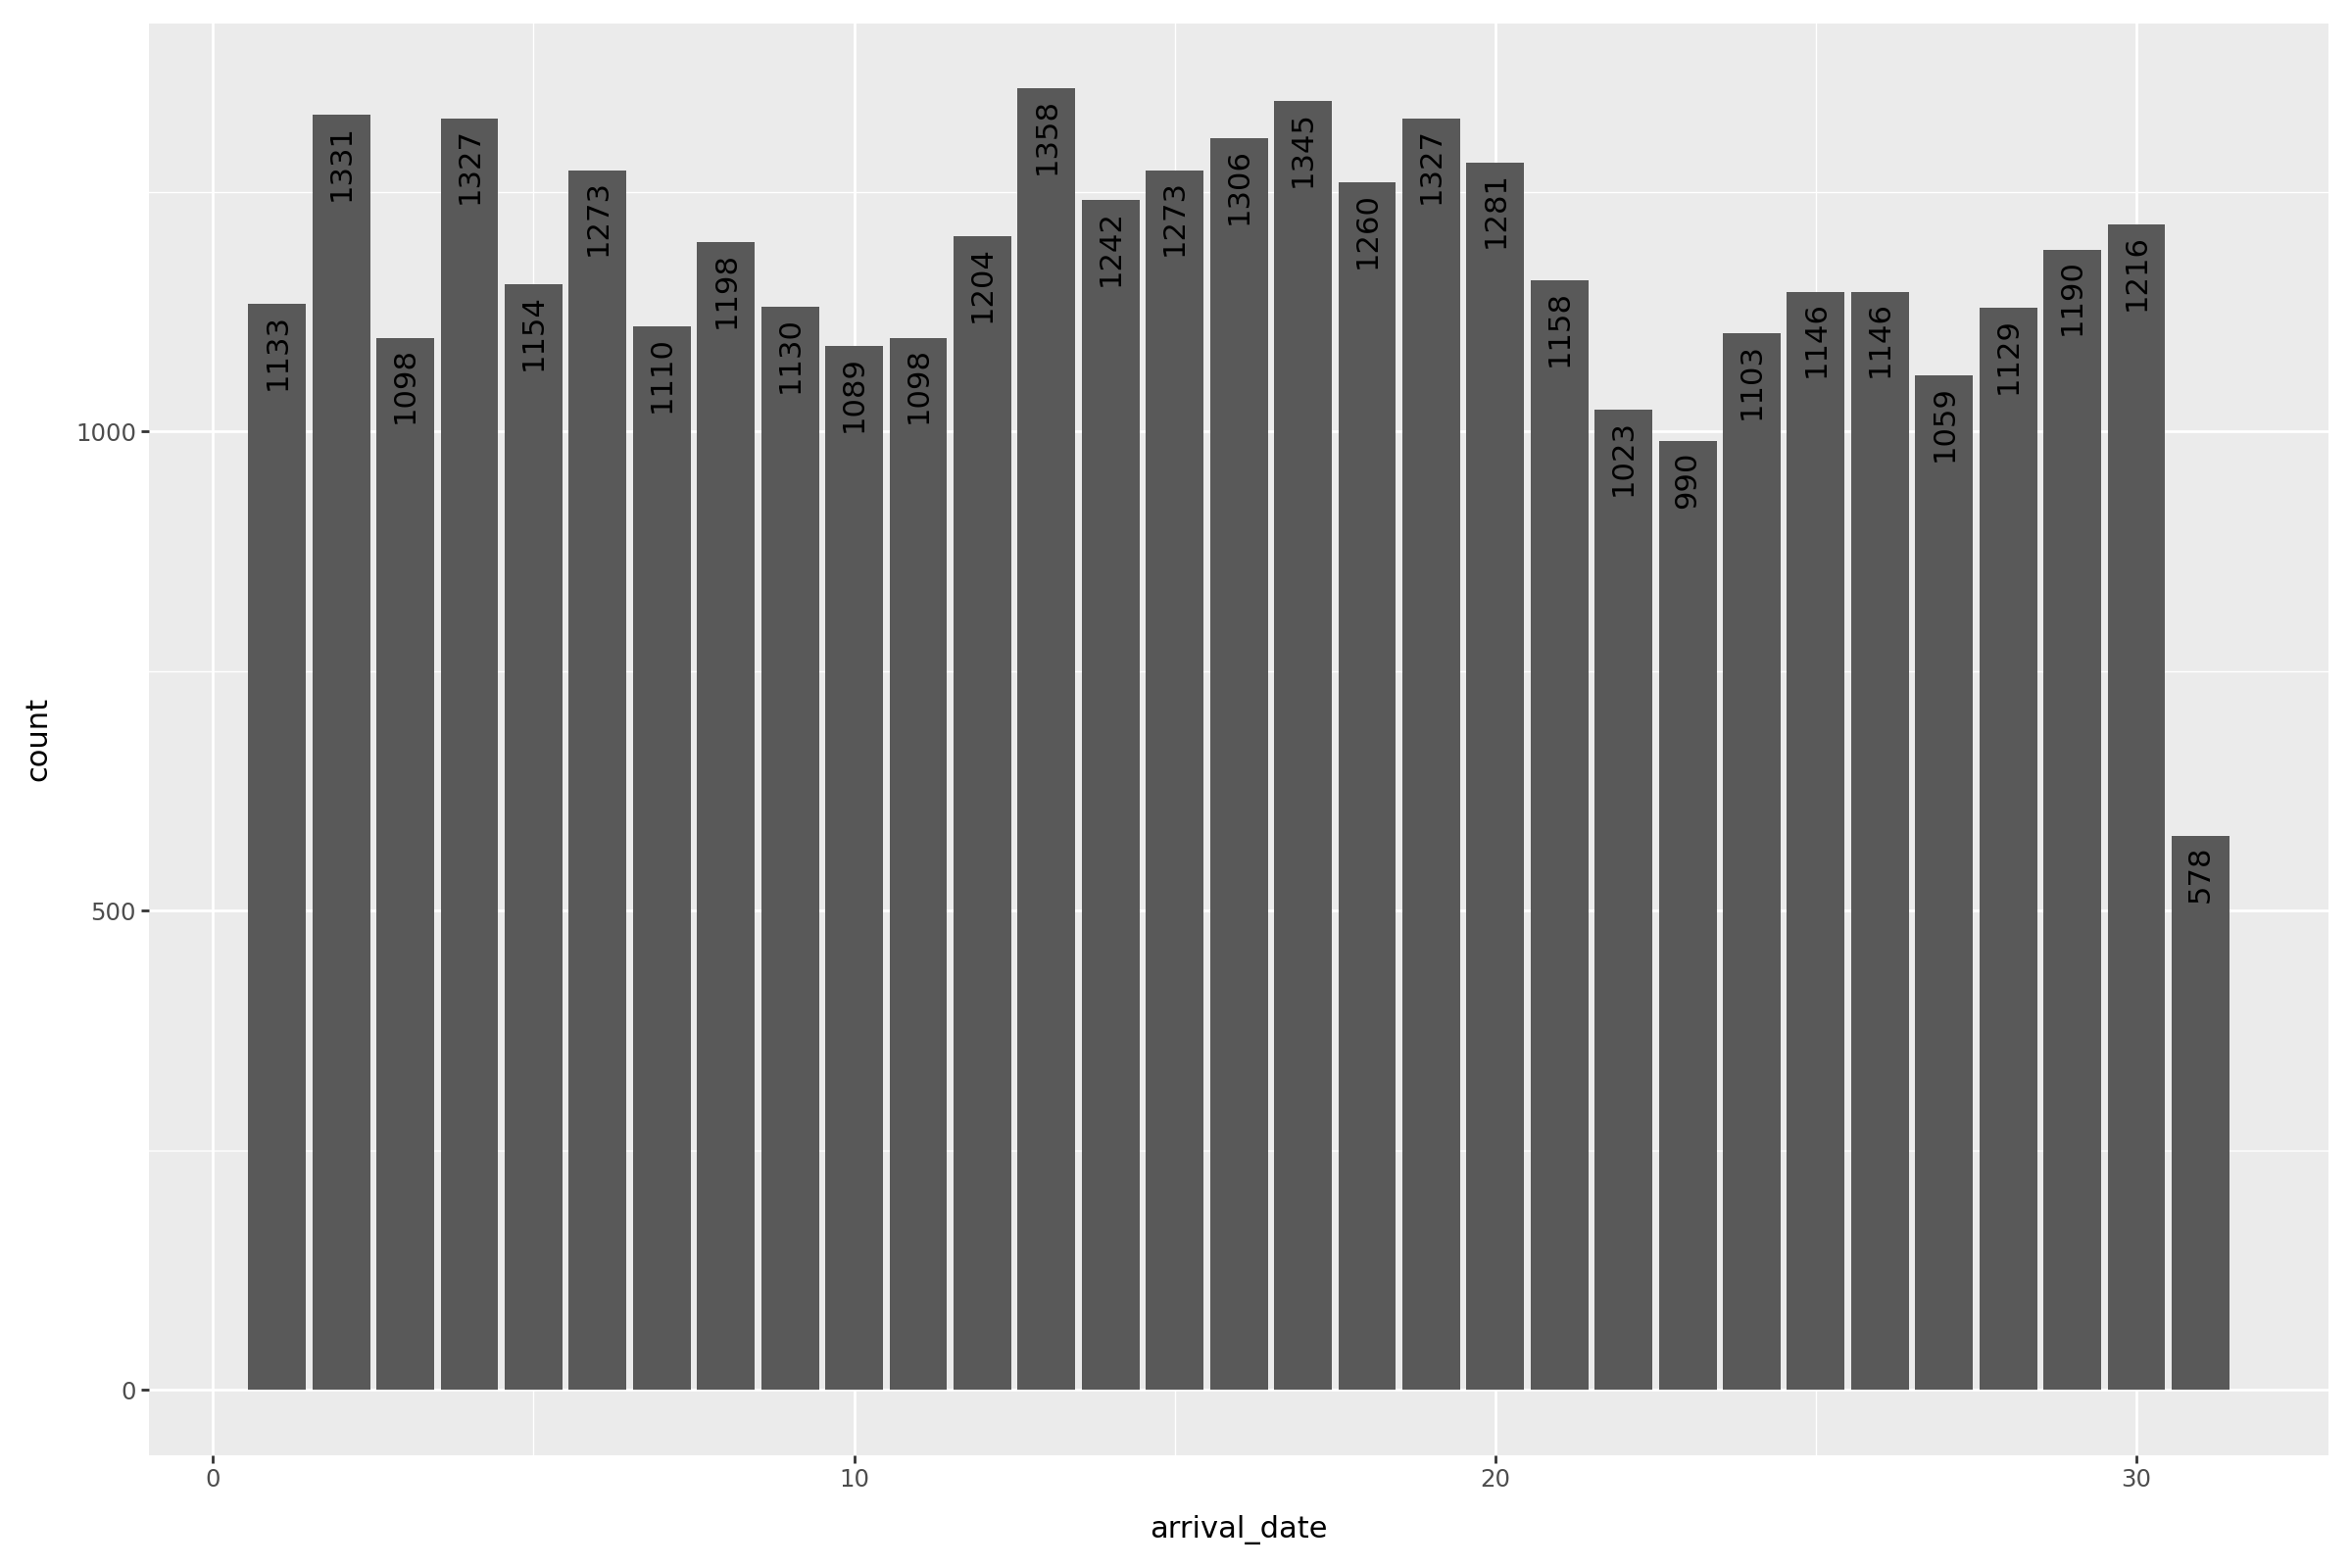

In [8]:
# PLOT + cancellation percentage for field values

# 5 categorical
#Booking_ID 
#type_of_meal_plan, no or 1-3
#room_type_reserved, 1-7
#market_segment_type 
#booking_status
cat = ["type_of_meal_plan", 
     "room_type_reserved",
     "market_segment_type",
     "booking_status",
      "repeated_guest",
      "required_car_parking_space"]

num = ["no_of_adults", "no_of_children", "no_of_weekend_nights",
       "no_of_week_nights",
       "arrival_year", "arrival_month", "arrival_date",
       "no_of_previous_cancellations",
       "no_of_previous_bookings_not_canceled", "no_of_special_requests"]

# Select a field to analyze, "arrival_date"
field = num[7] # or look at cat[]

values = data[field].unique()
values.sort()
total_cancellations = (data["booking_status"] == "Canceled").sum()

for value in values:
    res = data[data[field] == value]["booking_status"].value_counts()
    num_canceled = res.get('Canceled', 0)
    canceled_perc = num_canceled / total_cancellations * 100
    print(value)
    print(res)
    print(f"{canceled_perc:.2f}%")
    print()

plot_a_barplot(field)

In [9]:
# Check time period of a value
# Some values might be new for the hotel and have less instances

data['Arrival_Date_Combined'] = pd.to_datetime(
    data['arrival_year'].astype(str) + '-' +
    data['arrival_month'].astype(str) + '-' +
    data['arrival_date'].astype(str),
    errors='coerce' )

#loan_df['effective_date_dt'] = pd.to_datetime(loan_df.effective_date)
#loan_df['paid_off_time_dt'] = pd.to_datetime(loan_df.paid_off_time)
#loan_df

get_date_periods_by_field(field)


 Date Period Analysis for: arrival_date


,Start Date,End Date
arrival_date,,
1,2017-07-01,2018-12-01
2,2017-07-02,2018-12-02
3,2017-07-03,2018-12-03
4,2017-07-04,2018-12-04
5,2017-07-05,2018-12-05
6,2017-07-06,2018-12-06
7,2017-07-07,2018-12-07
8,2017-07-08,2018-12-08
9,2017-07-09,2018-12-09


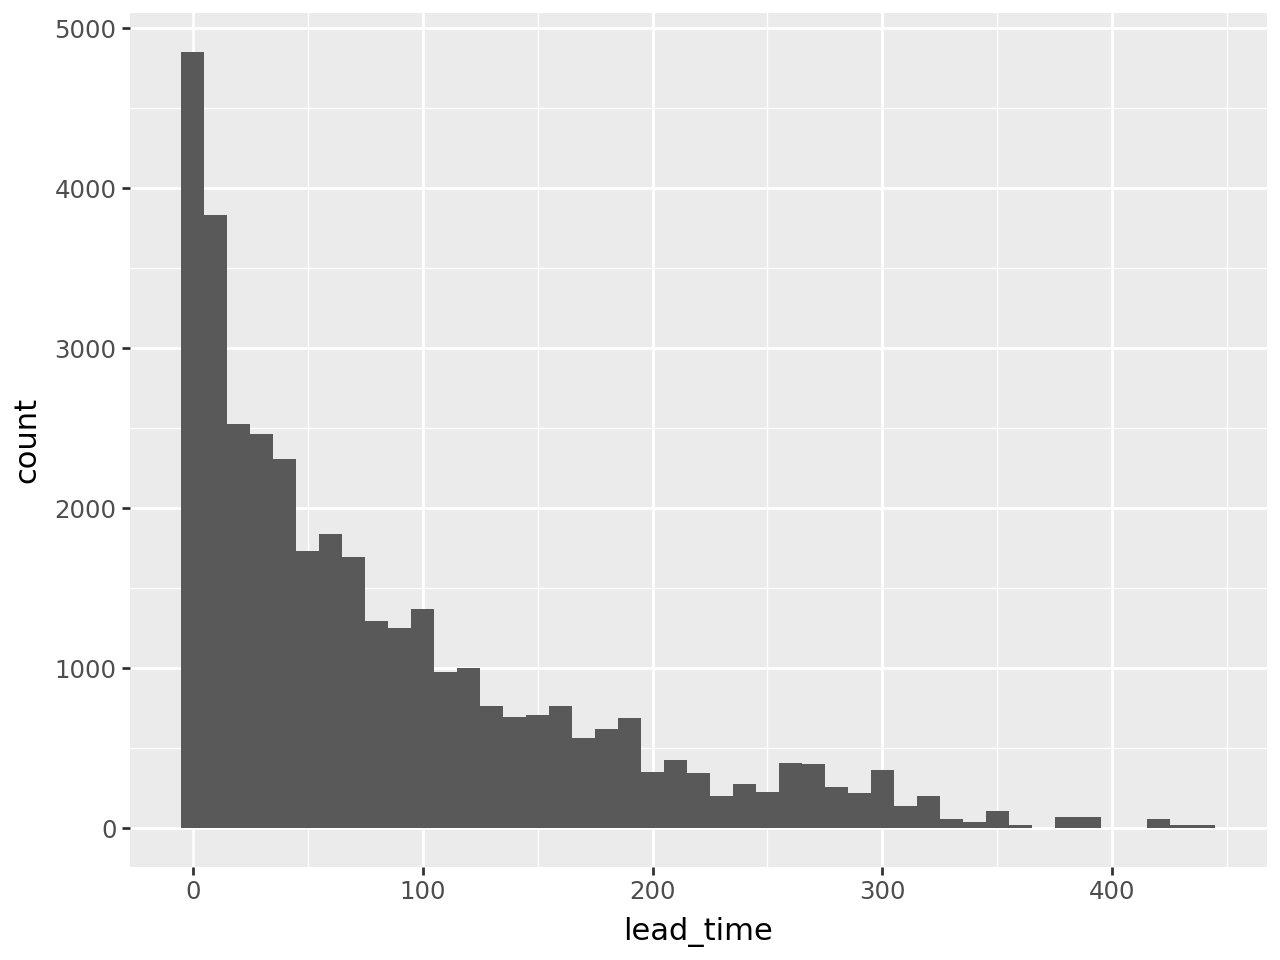

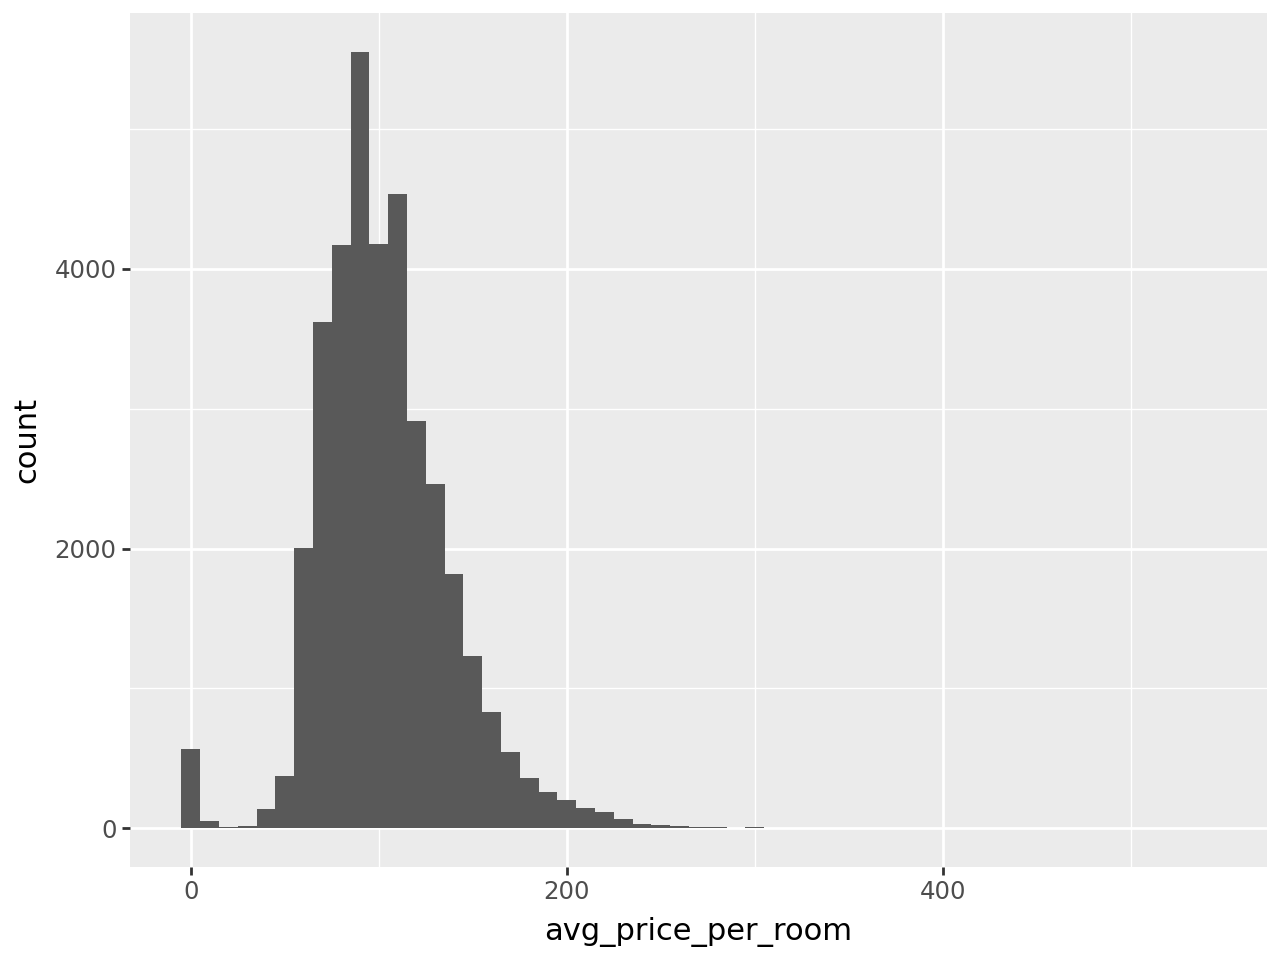

In [11]:
#HISTOGRAM

#lead_time (right skewed disrtibution)
#avg_price_per_room

lead_time_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "lead_time")
                            ) +
                            p9.geom_histogram(binwidth=10))#bins=20))
avg_price_per_room_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "avg_price_per_room")
                            ) +
                            p9.geom_histogram(binwidth=10))#bins=20))

lead_time_histogram.show()
avg_price_per_room_histogram.show()

## 3. Data preparation

In [53]:
# removal of unwanted instances

clean_data = data.copy().drop(columns = "Booking_ID")
clean_data = clean_data.query('market_segment_type != "Complementary"') # all complementary reservations have a 100% no-cancellation rate

# One-hot-encoding

# Define the mapping dictionary
room_mapping = {
    "Room_Type 1": 1,
    "Room_Type 2": 2,
    "Room_Type 3": 3,
    "Room_Type 4": 4,
    "Room_Type 5": 5,
    "Room_Type 6": 6,
    "Room_Type 7": 7
}
meal_mapping = {
    "Not Selected" : 0,
    "Meal Plan 1" : 1,
    "Meal Plan 2" : 2,
    "Meal Plan 3" : 3
}
cancellation_mapping = {
    "Not_Canceled" : True,
    "Canceled" : False
}


# Apply the mapping to the column
clean_data["room_type_reserved"] = clean_data["room_type_reserved"].map(room_mapping)
clean_data["type_of_meal_plan"] = clean_data["type_of_meal_plan"].map(meal_mapping)
clean_data["booking_status"] = clean_data["booking_status"].map(cancellation_mapping)

clean_data_dum = pd.get_dummies(clean_data)

clean_data_dum

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Arrival_Date_Combined,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224,2017,10,...,0,0,65.00,0,True,2017-10-02,False,False,True,False
1,2,0,2,3,0,0,1,5,2018,11,...,0,0,106.68,1,True,2018-11-06,False,False,False,True
2,1,0,2,1,1,0,1,1,2018,2,...,0,0,60.00,0,False,2018-02-28,False,False,False,True
3,2,0,0,2,1,0,1,211,2018,5,...,0,0,100.00,0,False,2018-05-20,False,False,False,True
4,2,0,1,1,0,0,1,48,2018,4,...,0,0,94.50,0,False,2018-04-11,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,...,0,0,167.80,1,True,2018-08-03,False,False,False,True
36271,2,0,1,3,1,0,1,228,2018,10,...,0,0,90.95,2,False,2018-10-17,False,False,False,True
36272,2,0,2,6,1,0,1,148,2018,7,...,0,0,98.39,2,True,2018-07-01,False,False,False,True
36273,2,0,0,3,0,0,1,63,2018,4,...,0,0,94.50,0,False,2018-04-21,False,False,False,True


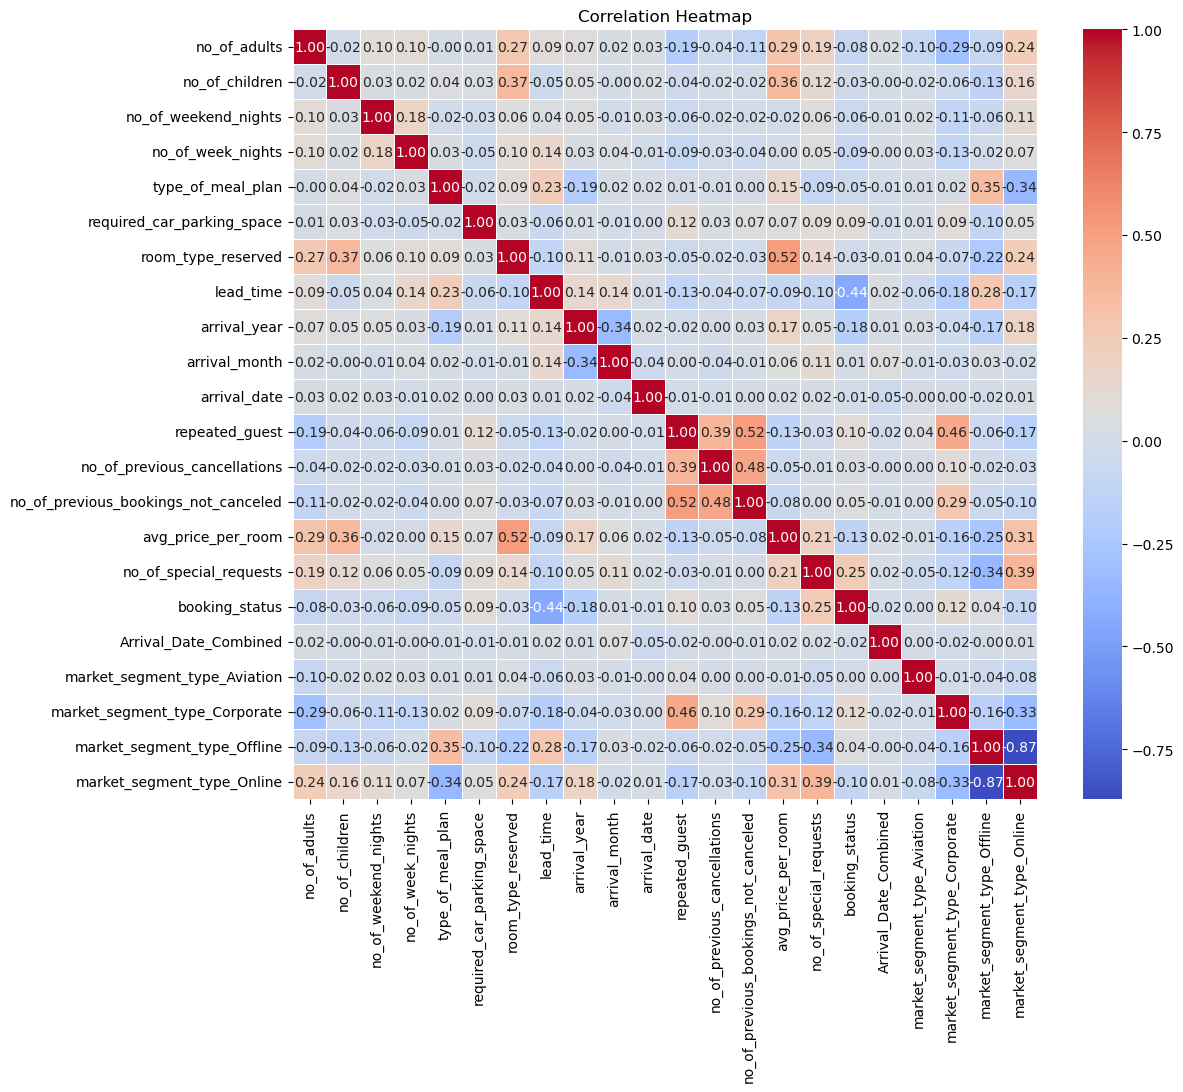

In [56]:
import seaborn as sns
# 1. Calculate the correlation matrix
corr_matrix = clean_data_dum.corr()

# 2. Set up the figure size (adjust width and height as needed)
plt.figure(figsize=(12, 10))

# 3. Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True,        # Show the numbers on the squares
            fmt=".2f",         # Format numbers to 2 decimal places
            cmap='coolwarm',   # Color map (Blue for low, Red for high)
            linewidths=0.5)    # Space between squares

# 4. Add title and show
plt.title("Correlation Heatmap")
plt.show()